In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
X = np.array([
    [800, 2, 10, 0],
    [850, 2, 12, 0],
    [900, 3, 8, 0],
    [950, np.nan, 7, 0],
    [1000, 3, 6, 1],
    [1050, 4, np.nan, 1],
    [np.nan, 4, 4, 1],
    [5000, 10, 1, 1]     
], dtype=float)

print("Original Array:\n", X)
print("Shape:", X.shape)

Original Array:
 [[8.00e+02 2.00e+00 1.00e+01 0.00e+00]
 [8.50e+02 2.00e+00 1.20e+01 0.00e+00]
 [9.00e+02 3.00e+00 8.00e+00 0.00e+00]
 [9.50e+02      nan 7.00e+00 0.00e+00]
 [1.00e+03 3.00e+00 6.00e+00 1.00e+00]
 [1.05e+03 4.00e+00      nan 1.00e+00]
 [     nan 4.00e+00 4.00e+00 1.00e+00]
 [5.00e+03 1.00e+01 1.00e+00 1.00e+00]]
Shape: (8, 4)


In [101]:
for col in range(X.shape[1]):
    col_mean = np.nanmean(X[:, col])
    X[np.isnan(X[:, col]), col] = col_mean

print("\nAfter replacing missing values:\n", X)


After replacing missing values:
 [[8.00000000e+02 2.00000000e+00 1.00000000e+01 0.00000000e+00]
 [8.50000000e+02 2.00000000e+00 1.20000000e+01 0.00000000e+00]
 [9.00000000e+02 3.00000000e+00 8.00000000e+00 0.00000000e+00]
 [9.50000000e+02 4.00000000e+00 7.00000000e+00 0.00000000e+00]
 [1.00000000e+03 3.00000000e+00 6.00000000e+00 1.00000000e+00]
 [1.05000000e+03 4.00000000e+00 6.85714286e+00 1.00000000e+00]
 [1.50714286e+03 4.00000000e+00 4.00000000e+00 1.00000000e+00]
 [5.00000000e+03 1.00000000e+01 1.00000000e+00 1.00000000e+00]]


In [102]:
X_features = X[:, :-1]
y_target = X[:, -1]

print("\nFeatures:\n", X_features)
print("\nTarget:\n", y_target)


Features:
 [[8.00000000e+02 2.00000000e+00 1.00000000e+01]
 [8.50000000e+02 2.00000000e+00 1.20000000e+01]
 [9.00000000e+02 3.00000000e+00 8.00000000e+00]
 [9.50000000e+02 4.00000000e+00 7.00000000e+00]
 [1.00000000e+03 3.00000000e+00 6.00000000e+00]
 [1.05000000e+03 4.00000000e+00 6.85714286e+00]
 [1.50714286e+03 4.00000000e+00 4.00000000e+00]
 [5.00000000e+03 1.00000000e+01 1.00000000e+00]]

Target:
 [0. 0. 0. 0. 1. 1. 1. 1.]


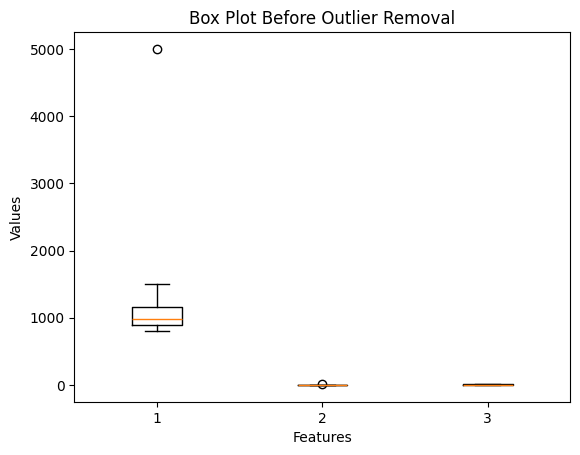

In [103]:
plt.boxplot(X_features)
plt.title("Box Plot Before Outlier Removal")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

In [104]:
Q1 = np.percentile(X_features, 25, axis=0)
Q3 = np.percentile(X_features, 75, axis=0)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR    

In [105]:
mask = np.all(
    (X_features >= lower_bound) & (X_features <= upper_bound),
    axis=1
)

X_clean = X_features[mask]
y_clean = y_target[mask]

print("\nAfter removing outliers:")
print("Clean Features:\n", X_clean)
print("Clean Target:\n", y_clean)


After removing outliers:
Clean Features:
 [[ 800.            2.           10.        ]
 [ 850.            2.           12.        ]
 [ 900.            3.            8.        ]
 [ 950.            4.            7.        ]
 [1000.            3.            6.        ]
 [1050.            4.            6.85714286]
 [1507.14285714    4.            4.        ]]
Clean Target:
 [0. 0. 0. 0. 1. 1. 1.]


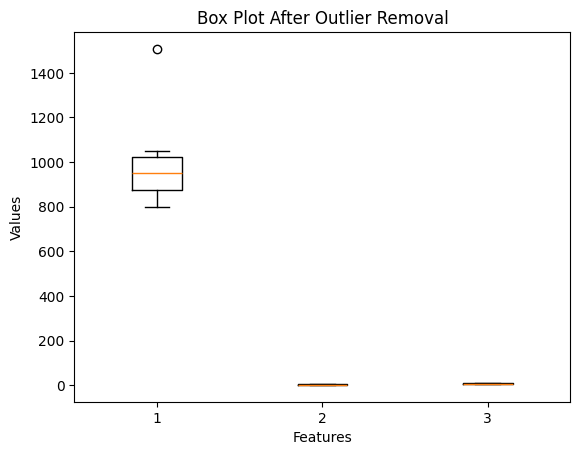

In [106]:
plt.boxplot(X_clean)
plt.title("Box Plot After Outlier Removal")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()


In [107]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

print("\nStandardized Features:\n", X_scaled)


Standardized Features:
 [[-0.95264717 -1.37198868  0.94541638]
 [-0.72382506 -1.37198868  1.765335  ]
 [-0.49500294 -0.17149859  0.12549775]
 [-0.26618083  1.02899151 -0.28446156]
 [-0.03735871 -0.17149859 -0.69442088]
 [ 0.1914634   1.02899151 -0.34302718]
 [ 2.28355131  1.02899151 -1.5143395 ]]
